# Action Graph 

In [42]:
import syft as sy
from syft.service.action.action_graph_service import ActionGraphService, NodeActionDataUpdate
from syft.service.action.action_graph import InMemoryActionGraphStore, InMemoryGraphConfig, InMemoryStoreClientConfig

from syft.service.context import AuthedServiceContext
from syft.node.credentials import SyftSigningKey
from syft.service.action.action_graph import Action
from syft.service.action.numpy import NumpyArrayObject, ActionObject
import numpy as np
import matplotlib.pyplot as plt

## Scenario for performing some computation

```python

import syft as sy

domain_client = sy.login("....")

dataset = domain_client.datasets[0]

a = dataset.assets["A"]

b = dataset.assets["B"]

c = a + b

d = domain_client.api.numpy.array([1, 2, 3])

e = c * d

# Inplace operation, mutated the value of d
d.astype('int32')

f = d + 48
```

<br>
<br>

**Corresponding Actions Generated**

```

action1 -> a + b

action2 -> initialization of variable `d`

action3 -> c * d

action4 -> inplace updation of type of `d` (d.astype('int32'))

action5 -> d + 48

```

![graph.png](graph.png)

### Initializing the Store

In [4]:
# Create a Config

store_config = InMemoryGraphConfig()

In [5]:
# Initialize the InMemory Store

graph_store = InMemoryActionGraphStore(store_config=store_config)

### Initializing Action Graph Service

In [6]:
action_graph_service = ActionGraphService(store=graph_store)

In [13]:
signing_key = SyftSigningKey.generate()
authed_context = AuthedServiceContext(credentials=signing_key.verify_key)

### SerDe the Store

In [7]:
bytes_data = sy.serialize(graph_store, to_bytes=True)

In [8]:
bytes_data

b'\x00\x00\x00\x00\xf1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00-\x00\x00\x00\x16\x00\x00\x001\x00\x00\x00\x16\x00\x00\x00\x05\x00\x00\x00\xd2\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00syft.service.action.action_graph.InMemoryActionGraphStore\x00\x00\x00\x00\x00\x00\x00\r\x00\x00\x002\x00\x00\x00\xb9\x00\x00\x00j\x00\x00\x00\t\x00\x00\x00\x0e\x00\x00\x00\xb9\x00\x00\x00\x0e\x00\x00\x00graph\x00\x00\x00\x01\x00\x00\x00\x82\n\x00\x00\x00\x00\x00\x00)\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00)\x00\x00\x00\x0e\x00\x00\x00)\x00\x00\x00\x0e\x00\x00\x00\x05\x00\x00\x00\xb2\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00syft.service.action.action_graph.NetworkXBackingStore\x00\x00\x00\x05\x00\x00\x00"\x00\x00\x00\x05\x00\x00\x00\x0e\x00\x00\x00_db\x00\x00\x00\x00\x00\x01\x00\x00\x00B\x06\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00\n\x01\x00\x00\x15\x00\x00\x00\x0e\x00\x00\x00networkx.cl

In [10]:
graph_store = sy.deserialize(bytes_data, from_bytes=True)

In [11]:
graph_store

In [ ]:
signing_key = SyftSigningKey.generate()
authed_context = AuthedServiceContext(credentials=signing_key.verify_key)

### Create some dummy data

In [16]:
action_obj_a = ActionObject.from_obj([2, 4, 6])
action_obj_b = ActionObject.from_obj([2, 3, 4])

In [17]:
action_obj_a.id, action_obj_b.id

(<UID: f31afebd86e1494c8b3bba8fe99d537f>,
 <UID: c480380d636d4dfdb35db1e80d09c8e8>)

### Action1 -> A + B

In [18]:
action1 = Action(
    path="action.execute",
    op="__add__",
    remote_self=action_obj_a.syft_lineage_id,
    args=[action_obj_b.syft_lineage_id],
    kwargs={}
)
action1

```python
class Action:
  id: str = 2c1ed9b1fed541c190d559b68a1a08be
  path: str = "action.execute"
  op: str = "__add__"
  remote_self: str = f31afebd86e1494c8b3bba8fe99d537f
  args: str = [<LineageID: c480380d636d4dfdb35db1e80d09c8e8 - 1684190487146412294>]
  kwargs: str = {}
  result_id: str = 5a736b497e1c43e39d1955cd22f1c1fb

```

### Save action to Graph

In [ ]:
action_graph_service.add_action

In [22]:
action_graph_service.add_action(context=authed_context, action=action1)

```python
class NodeActionData:
  id: str = 2c1ed9b1fed541c190d559b68a1a08be
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-24 01:10:46
  updated_at: str = None
  user_verify_key: str = 85efc78a16f4060319b6188dffac7ff6fa779b794cac8abec5f223dd787dca2b
  is_mutated: str = False

```

### Action2 -> np.array([1, 2, 3])

In [19]:
action_obj_d = ActionObject.from_obj([1, 2, 3])

In [20]:
# Create Action2

action2 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_d.syft_lineage_id],
    kwargs={}
)
action2

```python
class Action:
  id: str = 747749f9494345b78e165f13351e52bf
  path: str = "action.execute"
  op: str = "np.array"
  remote_self: str = None
  args: str = [<LineageID: 24f5d753a3c84b5a8dcb05f114839e56 - 1547479663948200243>]
  kwargs: str = {}
  result_id: str = 0cadbdb3506e4f72b0fce4f312e20966

```

In [23]:
# Save action to graph
action_graph_service.add_action(context=authed_context, action=action2)

```python
class NodeActionData:
  id: str = 747749f9494345b78e165f13351e52bf
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-24 01:12:08
  updated_at: str = None
  user_verify_key: str = 85efc78a16f4060319b6188dffac7ff6fa779b794cac8abec5f223dd787dca2b
  is_mutated: str = False

```

In [ ]:
# 747749f9494345b78e165f13351e52bf: {"data": NodeActionData()}

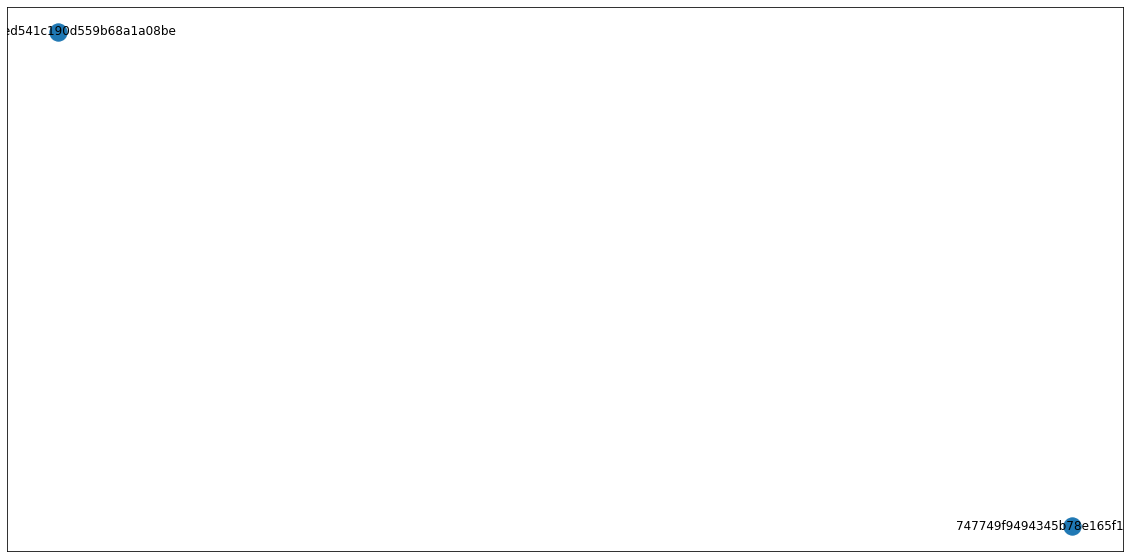

In [27]:
plt.figure(figsize=(20, 10))
action_graph_service.store.graph.visualize()

### Action3 -> C * D

In [28]:
action3 = Action(
    path="action.execute",
    op="__mul__",
    remote_self=action1.result_id,
    args=[action2.result_id],
    kwargs={}
)
action3

```python
class Action:
  id: str = 8545e5e7ef8a4a198334f227fe227b69
  path: str = "action.execute"
  op: str = "__mul__"
  remote_self: str = 5a736b497e1c43e39d1955cd22f1c1fb
  args: str = [<LineageID: 0cadbdb3506e4f72b0fce4f312e20966 - 1615334921920087294>]
  kwargs: str = {}
  result_id: str = 9bccf6ff15c146e696b98458335451dc

```

In [29]:
action_graph_service.add_action(context=authed_context, action=action3)

```python
class NodeActionData:
  id: str = 8545e5e7ef8a4a198334f227fe227b69
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-24 01:22:38
  updated_at: str = None
  user_verify_key: str = 85efc78a16f4060319b6188dffac7ff6fa779b794cac8abec5f223dd787dca2b
  is_mutated: str = False

```

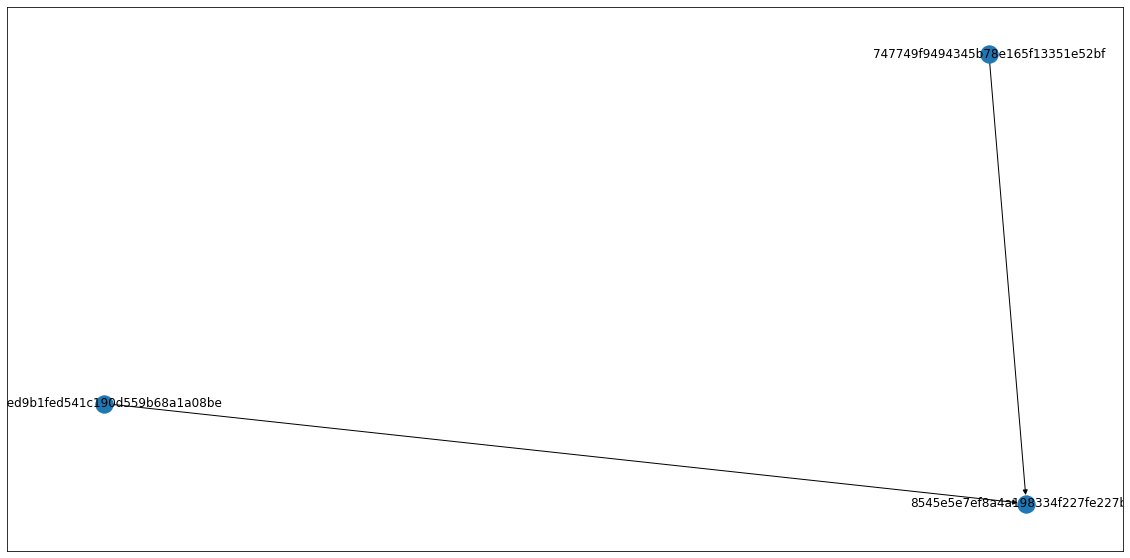

In [30]:
plt.figure(figsize=(20, 10))
action_graph_service.store.graph.visualize()

### Action4 -> Mutate type of D

In [32]:
as_type_action_obj = ActionObject.from_obj('np.int32')

In [33]:
as_type_action_obj

'np.int32'

In [34]:
action4 = Action(
    path="action.execute",
    op="astype",
    remote_self=action2.result_id,
    args=[as_type_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action2.result_id
)
action4

```python
class Action:
  id: str = 9606e52bb56e4cc9be471a049cabd776
  path: str = "action.execute"
  op: str = "astype"
  remote_self: str = 0cadbdb3506e4f72b0fce4f312e20966
  args: str = [<LineageID: 7214a1aff27543948c60486bf546dbfd - 2091172072086632637>]
  kwargs: str = {}
  result_id: str = 0cadbdb3506e4f72b0fce4f312e20966

```

In [36]:
action_graph_service.add_action(context=authed_context, action=action4)

```python
class NodeActionData:
  id: str = 9606e52bb56e4cc9be471a049cabd776
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-24 01:40:31
  updated_at: str = None
  user_verify_key: str = 85efc78a16f4060319b6188dffac7ff6fa779b794cac8abec5f223dd787dca2b
  is_mutated: str = False

```

In [40]:
action_2_node_data = action_graph_service.store.get(uid=action2.id, credentials=authed_context.credentials).ok()
action_2_node_data

```python
class NodeActionData:
  id: str = 747749f9494345b78e165f13351e52bf
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-24 01:12:08
  updated_at: str = None
  user_verify_key: str = 85efc78a16f4060319b6188dffac7ff6fa779b794cac8abec5f223dd787dca2b
  is_mutated: str = False

```

In [43]:
action_graph_service.update(context=authed_context, action_id=action2.id, node_data=NodeActionDataUpdate(is_mutated=True))

```python
class NodeActionData:
  id: str = 747749f9494345b78e165f13351e52bf
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-24 01:12:08
  updated_at: str = 2023-04-24 01:47:46
  user_verify_key: str = 85efc78a16f4060319b6188dffac7ff6fa779b794cac8abec5f223dd787dca2b
  is_mutated: str = True

```

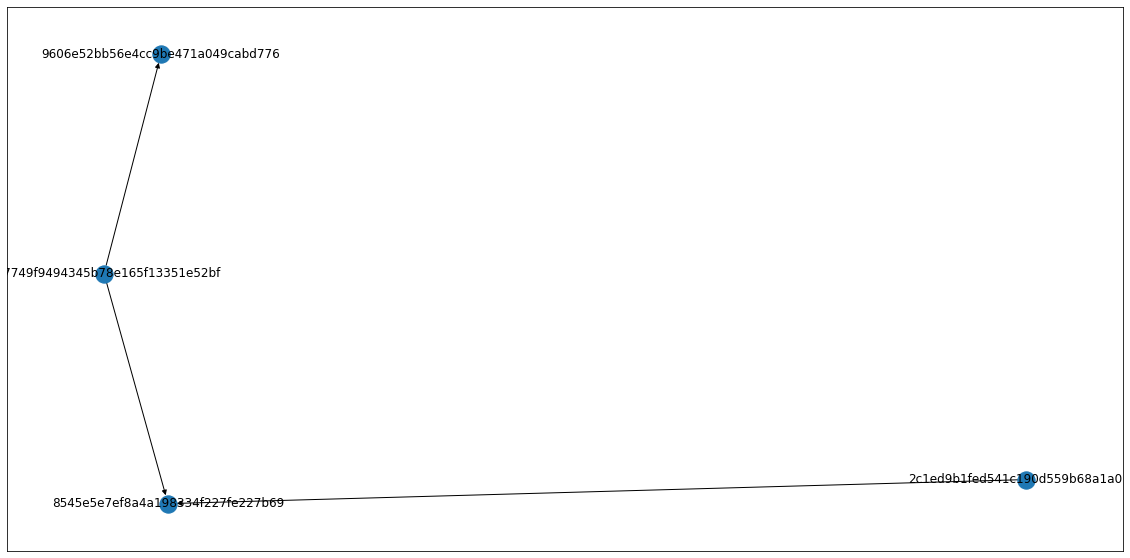

In [45]:
plt.figure(figsize=(20, 10))
action_graph_service.store.graph.visualize()

### Action5 -> D + 48

In [46]:
arg_action_obj = ActionObject.from_obj(48)

In [61]:
action2.result_id == action4.result_id

True

In [47]:
action5 = Action(
    path="action.execute",
    op="__add__",
    remote_self=action2.result_id,
    args=[arg_action_obj.syft_lineage_id],
    kwargs={},
)
action5

```python
class Action:
  id: str = cdbd247bb8184abfb0d05bea9f16ceb9
  path: str = "action.execute"
  op: str = "__add__"
  remote_self: str = 0cadbdb3506e4f72b0fce4f312e20966
  args: str = [<LineageID: c1366a55d15140ca8265615d62b1103f - 871644491213903555>]
  kwargs: str = {}
  result_id: str = 24618a06853d4405ae738b042c8b16cb

```

In [48]:
action_graph_service.add_action(context=authed_context, action=action5)

```python
class NodeActionData:
  id: str = cdbd247bb8184abfb0d05bea9f16ceb9
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-24 01:52:30
  updated_at: str = None
  user_verify_key: str = 85efc78a16f4060319b6188dffac7ff6fa779b794cac8abec5f223dd787dca2b
  is_mutated: str = False

```

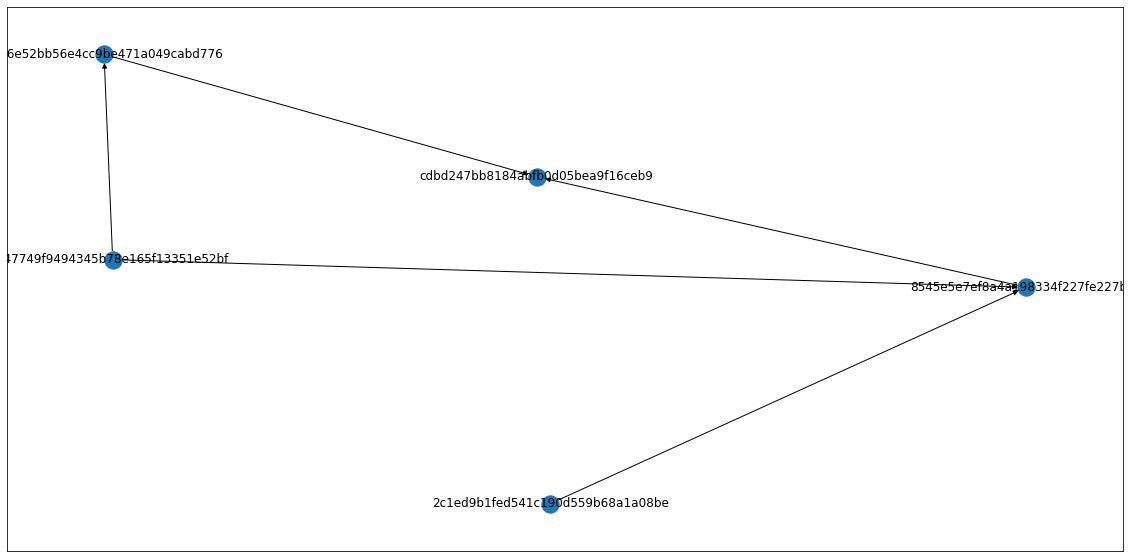

In [50]:
plt.figure(figsize=(20, 10))
action_graph_service.store.graph.visualize()

In [58]:
arg_action_obj.syft_lineage_id

<LineageID: c1366a55d15140ca8265615d62b1103f - 871644491213903555>

In [54]:
action1.id, action2.id, action3.id, action4.id, action5.id

(<UID: 2c1ed9b1fed541c190d559b68a1a08be>,
 <UID: 747749f9494345b78e165f13351e52bf>,
 <UID: 8545e5e7ef8a4a198334f227fe227b69>,
 <UID: 9606e52bb56e4cc9be471a049cabd776>,
 <UID: cdbd247bb8184abfb0d05bea9f16ceb9>)

```

action1 -> a + b

action2 -> initialization of variable `d`

action3 -> c * d

action4 -> inplace updation of type of `d` (d.astype('int32'))

action5 -> d + 48

```

In [ ]:
# D = np.array([1, 2, 3]) # D.result_id => UID1

# D.astype(np.int32) -> UID1

# obj = 'np.int32' -> UID2

# OP(UID1,  UID2) -> UID1

In [21]:
from syft.service.action.action_graph import ActionStatus

In [22]:
action_graph_service.get_by_action_status(context=authed_context, status=ActionStatus.PROCESSING)

,type,id
0,<UID: abb0aa40a7bc4044977c577ca19ae9d7>,None
1,<UID: 3ee2a033d4e8481a81f4eb57e84fe96a>,None
2,<UID: 98684139708341488a871dea9c9f046d>,None


In [23]:
action_graph_service.get_by_verify_key(context=authed_context, verify_key=signing_key.verify_key)

,type,id
0,<UID: abb0aa40a7bc4044977c577ca19ae9d7>,None
1,<UID: 3ee2a033d4e8481a81f4eb57e84fe96a>,None
2,<UID: 98684139708341488a871dea9c9f046d>,None


In [24]:
action_obj_c = ActionObject.from_obj(23)

In [25]:
action4 = Action(
    path="action.execute",
    op="__mul__",
    remote_self=action3.result_id,
    args=[action_obj_c.syft_lineage_id],
    kwargs={}
)
action4

```python
class Action:
  id: str = 5d1be306e18649dc9c9249ef253c5466
  path: str = "action.execute"
  op: str = "__mul__"
  remote_self: str = aa872140ff754a29946ff197df77e70a
  args: str = [<LineageID: fc442b3020154434a58469463e478328 - 551060690433058060>]
  kwargs: str = {}
  result_id: str = 2da94afab2db4e8a9c43d7946db9e0fe

```

In [26]:
action_graph_service.add_action(context=authed_context, action=action4)

```python
class NodeActionData:
  id: str = 5d1be306e18649dc9c9249ef253c5466
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-24 00:03:08
  updated_at: str = None
  user_verify_key: str = 0bcd289c7b3c7c50cf51d00784cfbb519713b8da664a9700dc5d88e1d554c442
  is_mutated: str = False

```

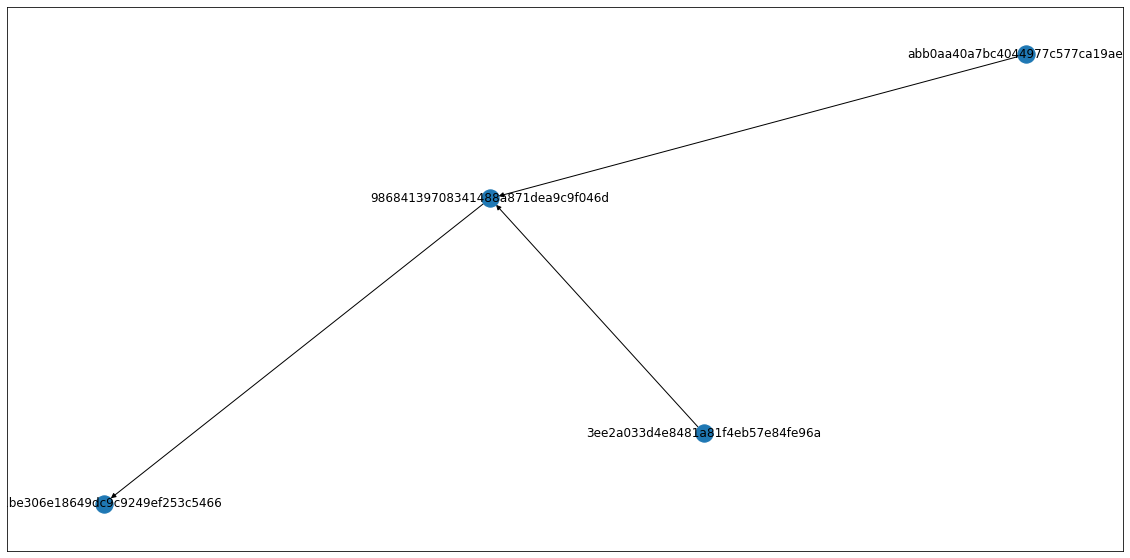

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
action_graph_service.store.graph.visualize()

In [28]:
action_obj_d = ActionObject.from_obj("np.int32")

In [29]:
# How is an action created when the args and kwargs are not numbers

action5 = Action(
    path="action.execute",
    op="astype",
    remote_self=action1.result_id,
    args=[action_obj_d.syft_lineage_id],
    kwargs={},
    result_id=action1.result_id
)
action5

```python
class Action:
  id: str = 0f391bbf0d4c4df2a659b3d033e52565
  path: str = "action.execute"
  op: str = "astype"
  remote_self: str = 114e431f666044f2a704d5aed5357dc8
  args: str = [<LineageID: f89847ebb2b94b1da23f3c4ef6d4e3a3 - 504820614266043598>]
  kwargs: str = {}
  result_id: str = 114e431f666044f2a704d5aed5357dc8

```

In [30]:
action_1_node_data = action_graph_service.store.get(uid=action1.id, credentials=authed_context).ok()

In [31]:
action_graph_service.add_action(context=authed_context, action=action5)

```python
class NodeActionData:
  id: str = 0f391bbf0d4c4df2a659b3d033e52565
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-24 00:03:08
  updated_at: str = None
  user_verify_key: str = 0bcd289c7b3c7c50cf51d00784cfbb519713b8da664a9700dc5d88e1d554c442
  is_mutated: str = False

```

In [32]:
action_1_node_data

```python
class NodeActionData:
  id: str = abb0aa40a7bc4044977c577ca19ae9d7
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-24 00:03:08
  updated_at: str = None
  user_verify_key: str = 0bcd289c7b3c7c50cf51d00784cfbb519713b8da664a9700dc5d88e1d554c442
  is_mutated: str = False

```

In [33]:
action_1_node_data.is_mutated = True

In [34]:
action_1_node_data

```python
class NodeActionData:
  id: str = abb0aa40a7bc4044977c577ca19ae9d7
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-24 00:03:08
  updated_at: str = None
  user_verify_key: str = 0bcd289c7b3c7c50cf51d00784cfbb519713b8da664a9700dc5d88e1d554c442
  is_mutated: str = True

```

In [35]:
setattr(action_1_node_data, "is_mutated", True)

In [36]:
action_1_node_data

```python
class NodeActionData:
  id: str = abb0aa40a7bc4044977c577ca19ae9d7
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-24 00:03:08
  updated_at: str = None
  user_verify_key: str = 0bcd289c7b3c7c50cf51d00784cfbb519713b8da664a9700dc5d88e1d554c442
  is_mutated: str = True

```

In [37]:
action_graph_service.update(authed_context, action1.id, action_1_node_data)

```python
class NodeActionData:
  id: str = abb0aa40a7bc4044977c577ca19ae9d7
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-24 00:03:08
  updated_at: str = None
  user_verify_key: str = 0bcd289c7b3c7c50cf51d00784cfbb519713b8da664a9700dc5d88e1d554c442
  is_mutated: str = True

```

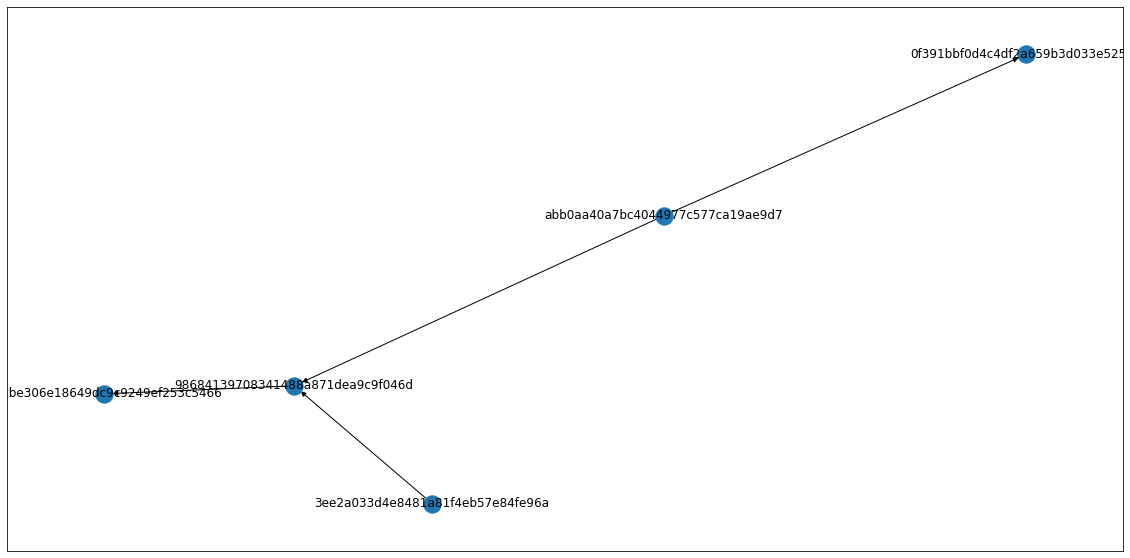

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
action_graph_service.store.graph.visualize()

In [39]:
# How is an action created when the args and kwargs are not numbers

action6 = Action(
    path="action.execute",
    op="__add__",
    remote_self=action1.result_id,
    args=[action_obj_c.syft_lineage_id],
    kwargs={},
)
action6

```python
class Action:
  id: str = cdbced7a0fa64585b5f46396d7460ab2
  path: str = "action.execute"
  op: str = "__add__"
  remote_self: str = 114e431f666044f2a704d5aed5357dc8
  args: str = [<LineageID: fc442b3020154434a58469463e478328 - 551060690433058060>]
  kwargs: str = {}
  result_id: str = 5b8993c153444877a8ba883e668d6140

```

In [40]:
action_graph_service.add_action(context=authed_context, action=action6)

```python
class NodeActionData:
  id: str = cdbced7a0fa64585b5f46396d7460ab2
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-24 00:03:20
  updated_at: str = None
  user_verify_key: str = 0bcd289c7b3c7c50cf51d00784cfbb519713b8da664a9700dc5d88e1d554c442
  is_mutated: str = False

```

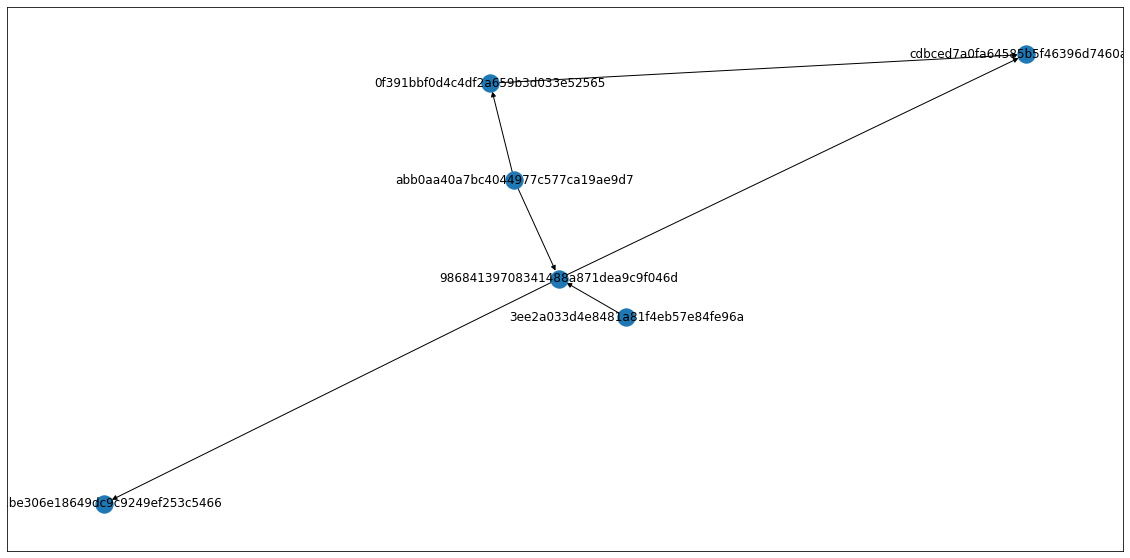

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
action_graph_service.store.graph.visualize()

In [45]:
action_graph_service.get_by_action_status(context=authed_context, status=ActionStatus.PROCESSING).__repr__()

'[<UID: 287f667bf0c14afca0607cf486445519>, <UID: fa0005f34339441aa07140653194bc2d>, <UID: 2c4d591a57804a21ad627dd7ef8303bf>, <UID: b46031f22302446faab0968ebc516d3d>, <UID: 3cde5dc9fcdd44d2bee74deb5edbfc94>, <UID: bced99605c9b4c3abae57c0ec7fb2047>]'

In [54]:
action_graph_service.get_all_nodes(authed_context)

NodeDataView({<UID: 287f667bf0c14afca0607cf486445519>: {'data': class NodeActionData:
  id: str = 287f667bf0c14afca0607cf486445519
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-22 06:48:57
  updated_at: str = None
  user_verify_key: str = f0d4c5c2e1aff12f710b42569aab38cc87fb9fa36c29e61b70e2ec325c82ab27
  is_mutated: str = False
}, <UID: fa0005f34339441aa07140653194bc2d>: {'data': class NodeActionData:
  id: str = fa0005f34339441aa07140653194bc2d
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-22 06:48:58
  updated_at: str = None
  user_verify_key: str = f0d4c5c2e1aff12f710b42569aab38cc87fb9fa36c29e61b70e2ec325c82ab27
  is_mutated: str = False
}, <UID: b46031f22302446faab0968ebc516d3d>: {'data': class NodeActionData:
  id: str = b46031f22302446faab0968ebc516d3d
  action: str = syft.service.action.act

In [53]:
action_graph_service.get_all_edges(authed_context)

OutEdgeView([(<UID: 287f667bf0c14afca0607cf486445519>, <UID: b46031f22302446faab0968ebc516d3d>), (<UID: 287f667bf0c14afca0607cf486445519>, <UID: 2c4d591a57804a21ad627dd7ef8303bf>), (<UID: 287f667bf0c14afca0607cf486445519>, <UID: 3cde5dc9fcdd44d2bee74deb5edbfc94>), (<UID: fa0005f34339441aa07140653194bc2d>, <UID: b46031f22302446faab0968ebc516d3d>), (<UID: b46031f22302446faab0968ebc516d3d>, <UID: bced99605c9b4c3abae57c0ec7fb2047>), (<UID: 2c4d591a57804a21ad627dd7ef8303bf>, <UID: 3cde5dc9fcdd44d2bee74deb5edbfc94>)])

In [49]:
sorted(action_graph_service.get_all_nodes(authed_context), key=lambda x: x['created_at'])

TypeError: tuple indices must be integers or slices, not str

In [ ]:
# class ActionGraph:
#     def __init__(self):
#         self.graph = nx.DiGraph()
        
#     def add(self, node: ActionGraphObject):
#         self.graph.add_node(node.id, data=node)
        
#     def add_relationship(self, nodeA: ActionGraphObject, nodeB: ActionGraphObject):
#         self.graph.add_edge(nodeA, nodeB)
        
#     def remove_node(self, node: ActionGraphObject):
#         self.graph.remove_node(node)
    
#     def remove_edge(self, node: ActionGraphObject):
#         self.graph.remove_edge(node)
        
#     def neighbors_for(self, node: ActionGraphObject):
#         return list(self.graph.neighbors(node))
        
#     def visualize(self, arrows: bool = True):
#         return nx.draw_networkx(self.graph)
        
#     def remove_all_nodes_from(self, node: ActionGraphObject):
#         all_adjacent_neighbors: list = []
            
#         def find_adjacent_neighbors(node: ActionGraphObject, neighbors: set):           
#             if not self.graph.neighbors(node):
#                 return 

#             my_neighbors = self.graph.neighbors(node)
#             for n in my_neighbors:
#                 if n not in neighbors:
#                     neighbors.add(n)
#                     self.find_adjacent_neighbors(n, neighbors)
                
#         find_adjacent_neighbors(all_adjacent_neighbors)
#         return all_adjacent_neighbors